# Hackaton IT-volontaire 25.07.2022 - 02.08.2022
## Задача 2. Бухгалтерская отчетность
### Ментор — Михаил Белоус

Из Росстата получены данные бухгалтерской отчетности всех действующих на май 2022 года фондов в России:

- Благотворительные фонды (ОКОПФ 070401)
- Общественные фонды (ОКОПФ 070403)
- Экологические фонды (ОКОПФ 070404)

Данные представлены за 2017-2021 годы. Считаем, что если в данных нет сведений по отчетности за какой-то год, это означает, что организация не предоставила отчетность за этот год.

- Очистить и описать данные
- Для тех организаций, которые подали отчетность, узнать, есть ли связь между материальным благополучием фонда и количеством штатных работников
- Определить факторы, влияющие на закредитованность, финансовое благополучие организации
- Любые дополнительные выводы и проверки

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [45]:
df = pd.read_excel('moscow.xlsx', sheet_name=1, header=3)
df.head()

,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,1,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1.167700e+12,2016-05-24 00:00:00,Действующая,7.728340e+09,Москва,45293598000,"Москва, Юго-Западный, Ясенево",4.591000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.157700e+12,2015-01-23 00:00:00,Действующая,7.714327e+09,Москва,45277598000,"Москва, Северный, Хорошевский",4.534800e+10,...,26152000.0,37596000.0,55565000.0,100240000.0,66550000.0,264000.0,182000.0,113857000.0,311245000.0,424930000.0
2,3,"1ПОМОГАЕТ, БФ",1.167700e+12,2016-04-28 00:00:00,Действующая,9.718006e+09,Москва,45263552000,"Москва, Восточный, Богородское",4.530100e+10,...,1458000.0,2559000.0,4027000.0,8474000.0,7814000.0,132000.0,1208000.0,1105000.0,898000.0,2313000.0
3,4,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.197700e+12,2019-08-13 00:00:00,Действующая,9.703000e+09,Москва,45286575000,"Москва, Центральный, Пресненский",4.538000e+10,...,NaN,NaN,213000.0,96000.0,35000.0,NaN,NaN,39000.0,43000.0,8000.0
4,5,"459 ОРСПН, ФОНД",1.217700e+12,2021-10-06 00:00:00,Действующая,9.721146e+09,Москва,45290578000,"Москва, Юго-Восточный, Нижегородский",4.539200e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Удаляем ненужные признаки

In [46]:
df.drop(['№', 'Регион регистрации', 'Код ОКАТО', 'Код ОКТМО', 'Код ОКОПФ', 'Код налогоплательщика'], axis=1, inplace=True)

In [47]:
df.shape

(3647, 156)

In [48]:
display(df.isnull().mean() * 100)

Наименование                                           0.000000
Регистрационный номер                                  0.054840
Дата регистрации                                       0.000000
Статус                                                 0.000000
Наименование ОКАТО                                     0.000000
                                                        ...    
2017, Остаток средств на конец отчетного года, RUB    80.285166
2018, Остаток средств на конец отчетного года, RUB    75.431862
2019, Остаток средств на конец отчетного года, RUB    71.894708
2020, Остаток средств на конец отчетного года, RUB    70.578558
2021, Остаток средств на конец отчетного года, RUB    71.044694
Length: 156, dtype: float64

In [49]:
df.head(3)

,Наименование,Регистрационный номер,Дата регистрации,Статус,Наименование ОКАТО,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1.167700e+12,2016-05-24 00:00:00,Действующая,"Москва, Юго-Западный, Ясенево",Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.157700e+12,2015-01-23 00:00:00,Действующая,"Москва, Северный, Хорошевский",Благотворительные фонды,NaN,NaN,NaN,NaN,...,26152000.0,37596000.0,55565000.0,100240000.0,66550000.0,264000.0,182000.0,113857000.0,311245000.0,424930000.0
2,"1ПОМОГАЕТ, БФ",1.167700e+12,2016-04-28 00:00:00,Действующая,"Москва, Восточный, Богородское",Благотворительные фонды,0 - 5,NaN,NaN,NaN,...,1458000.0,2559000.0,4027000.0,8474000.0,7814000.0,132000.0,1208000.0,1105000.0,898000.0,2313000.0


### Выделим из признака "Наименование ОКАТО" отдельно район Москвы и его расположение

In [50]:
def get_parse_direction(location):
    location = location.split(', ')[1:]
    if len(location):
        return location[0]
    else:
        return ''

def get_parse_location_name(location):
    location = location.split(', ')[1:]
    if len(location) == 2:
        return location[1]
    else:
        return ''
    

In [51]:
df['direction'] = df['Наименование ОКАТО'].apply(get_parse_direction)
df['location_name'] = df['Наименование ОКАТО'].apply(get_parse_location_name)

df.drop(['Наименование ОКАТО'], axis=1, inplace=True)

In [52]:
df[['direction', 'location_name']].head()

,direction,location_name
0,Юго-Западный,Ясенево
1,Северный,Хорошевский
2,Восточный,Богородское
3,Центральный,Пресненский
4,Юго-Восточный,Нижегородский


### Заполним пропуски пока нулями, в интересующих нас столбцах с метриками

#### Можно поиграться и позаполнять пропуски чем-то еще

In [53]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    '2017, Остаток средств на конец отчетного года, RUB': 0,
    '2018, Остаток средств на конец отчетного года, RUB': 0,
    '2019, Остаток средств на конец отчетного года, RUB': 0,
    '2020, Остаток средств на конец отчетного года, RUB': 0,
    '2021, Остаток средств на конец отчетного года, RUB': 0,
    '2017, Среднесписочная численность работников': 0,
    '2018, Среднесписочная численность работников': 0,
    '2019, Среднесписочная численность работников': 0,
    '2020, Среднесписочная численность работников': 0,
    '2021, Среднесписочная численность работников': 0
    
}
#заполняем пропуски в соответствии с заявленным словарем
df = df.fillna(values)
#выводим результирующую долю пропусков
df.isnull().mean()

Наименование                                          0.000000
Регистрационный номер                                 0.000548
Дата регистрации                                      0.000000
Статус                                                0.000000
Организационно-правовая форма                         0.000000
                                                        ...   
2019, Остаток средств на конец отчетного года, RUB    0.000000
2020, Остаток средств на конец отчетного года, RUB    0.000000
2021, Остаток средств на конец отчетного года, RUB    0.000000
direction                                             0.000000
location_name                                         0.000000
Length: 157, dtype: float64

### Преобразуем признак с численностью сотрудников в удобный вид

In [54]:
def get_employees(persons):
    if persons == 0:
        return 0
    if persons == '0 - 5':
        return 5
    elif persons == '6 - 10':
        return 10
    elif persons == '16 - 50':
        return 50
    elif persons == '51 - 100':
        return 100
    elif persons == '101 - 150':
        return 150
    elif persons == '151 - 200':
        return 200
    elif persons == '201 - 250':
        return 250
    elif persons == '201 - 250':
        return 250
    elif persons == '251 - 500':
        return 500
    elif persons == '501 - 1000':
        return 1000
    

In [55]:
df['2017 employees'] = df['2017, Среднесписочная численность работников'].apply(get_employees)
df['2018 employees'] = df['2018, Среднесписочная численность работников'].apply(get_employees)

df['2017 balance'] = df['2017, Остаток средств на конец отчетного года, RUB']/1e6
df['2018 balance'] = df['2018, Остаток средств на конец отчетного года, RUB']/1e6
df['2019 balance'] = df['2019, Остаток средств на конец отчетного года, RUB']/1e6
df['2020 balance'] = df['2020, Остаток средств на конец отчетного года, RUB']/1e6
df['2021 balance'] = df['2021, Остаток средств на конец отчетного года, RUB']/1e6

df.drop([
    '2017, Остаток средств на конец отчетного года, RUB',
    '2018, Остаток средств на конец отчетного года, RUB',
    '2019, Остаток средств на конец отчетного года, RUB',
    '2020, Остаток средств на конец отчетного года, RUB',
    '2021, Остаток средств на конец отчетного года, RUB',
    '2017, Среднесписочная численность работников',
    '2018, Среднесписочная численность работников',
    '2019, Среднесписочная численность работников',
    '2020, Среднесписочная численность работников',
    '2021, Среднесписочная численность работников'], axis=1, inplace=True)

In [56]:
df.head()

,Наименование,Регистрационный номер,Дата регистрации,Статус,Организационно-правовая форма,"2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB",...,"2021, Всего использовано средств, RUB",direction,location_name,2017 employees,2018 employees,2017 balance,2018 balance,2019 balance,2020 balance,2021 balance
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1.167700e+12,2016-05-24 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,NaN,Юго-Западный,Ясенево,0.0,0.0,0.000,0.000,0.000,0.000,0.000
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.157700e+12,2015-01-23 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,66550000.0,Северный,Хорошевский,0.0,0.0,0.264,0.182,113.857,311.245,424.930
2,"1ПОМОГАЕТ, БФ",1.167700e+12,2016-04-28 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,7814000.0,Восточный,Богородское,5.0,0.0,0.132,1.208,1.105,0.898,2.313
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1.197700e+12,2019-08-13 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,35000.0,Центральный,Пресненский,0.0,0.0,0.000,0.000,0.039,0.043,0.008
4,"459 ОРСПН, ФОНД",1.217700e+12,2021-10-06 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,NaN,Юго-Восточный,Нижегородский,0.0,0.0,0.000,0.000,0.000,0.000,0.000


### Выделяем столбцы, содержащие наши метрики

In [57]:
df_set = df[
    ['2017 balance',
    '2018 balance',
    '2019 balance',
    '2020 balance',
    '2021 balance',
    '2017 employees',
    '2018 employees']]

In [58]:
df_set.head()

,2017 balance,2018 balance,2019 balance,2020 balance,2021 balance,2017 employees,2018 employees
0,0.000,0.000,0.000,0.000,0.000,0.0,0.0
1,0.264,0.182,113.857,311.245,424.930,0.0,0.0
2,0.132,1.208,1.105,0.898,2.313,5.0,0.0
3,0.000,0.000,0.039,0.043,0.008,0.0,0.0
4,0.000,0.000,0.000,0.000,0.000,0.0,0.0


In [59]:
df_set.describe()

,2017 balance,2018 balance,2019 balance,2020 balance,2021 balance,2017 employees,2018 employees
count,3647.000000,3647.000000,3647.000000,3647.000000,3647.00000,3592.000000,3646.000000
mean,10.963871,14.476426,18.361399,14.053736,14.21774,1.518653,0.836533
std,180.146709,290.380997,261.681386,126.819934,134.72267,13.191505,12.227256
min,-461.628000,-196.673000,-33.436000,-27.676000,-151.80700,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.006000,0.014000,0.01400,0.000000,0.000000
max,9000.000000,16063.862000,9000.000000,3439.137000,3953.37200,500.000000,500.000000


Text(0.5, 1.0, 'Гистограмма распределения по численности сотрудников')

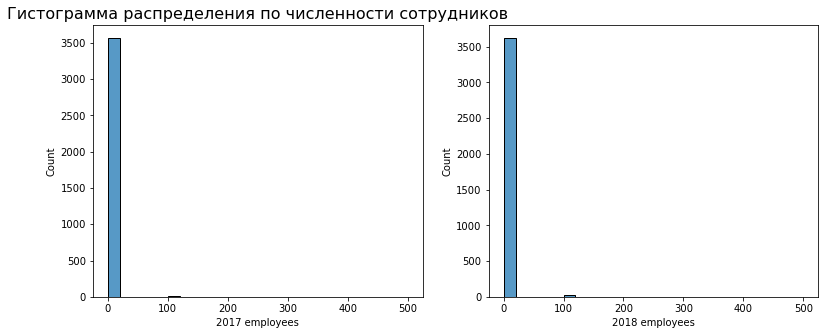

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.histplot(
    data=df_set,
    x='2017 employees',
    bins=25, #kde=True,
    ax=axes[0]
);

sns.histplot(
    data=df_set,
    x='2018 employees',
    bins=25, #kde=True,
    ax=axes[1]
);
axes[0].set_title('Гистограмма распределения по численности сотрудников', fontsize=16)

In [61]:
df_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2017 balance    3647 non-null   float64
 1   2018 balance    3647 non-null   float64
 2   2019 balance    3647 non-null   float64
 3   2020 balance    3647 non-null   float64
 4   2021 balance    3647 non-null   float64
 5   2017 employees  3592 non-null   float64
 6   2018 employees  3646 non-null   float64
dtypes: float64(7)
memory usage: 199.6 KB


<AxesSubplot:>

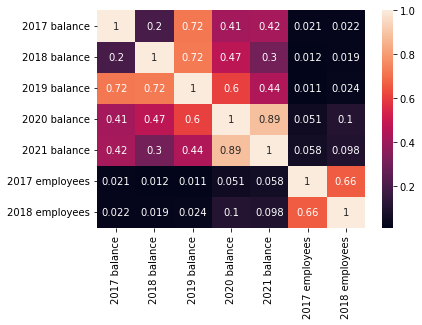

In [62]:
sns.heatmap(df_set.corr(), annot = True)

## 2017 год

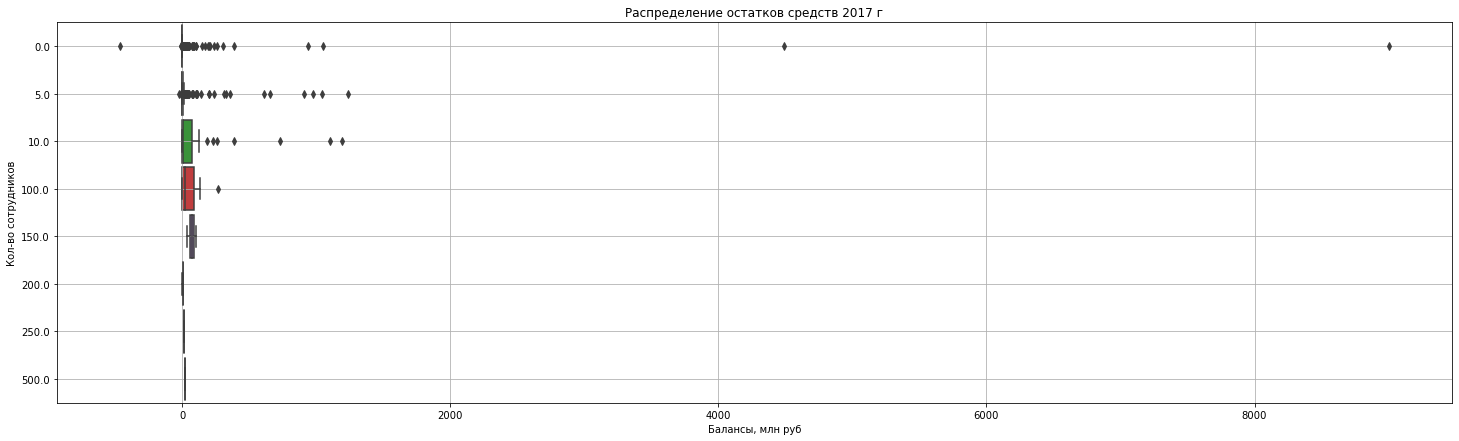

In [63]:
fig = plt.figure(figsize=(25, 7))
boxplot = sns.boxplot(
    data=df_set,
    x='2017 balance',
    y='2017 employees',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение остатков средств 2017 г');
boxplot.set_xlabel('Балансы, млн руб');
boxplot.set_ylabel('Кол-во сотрудников');
boxplot.grid()


## 2018 год

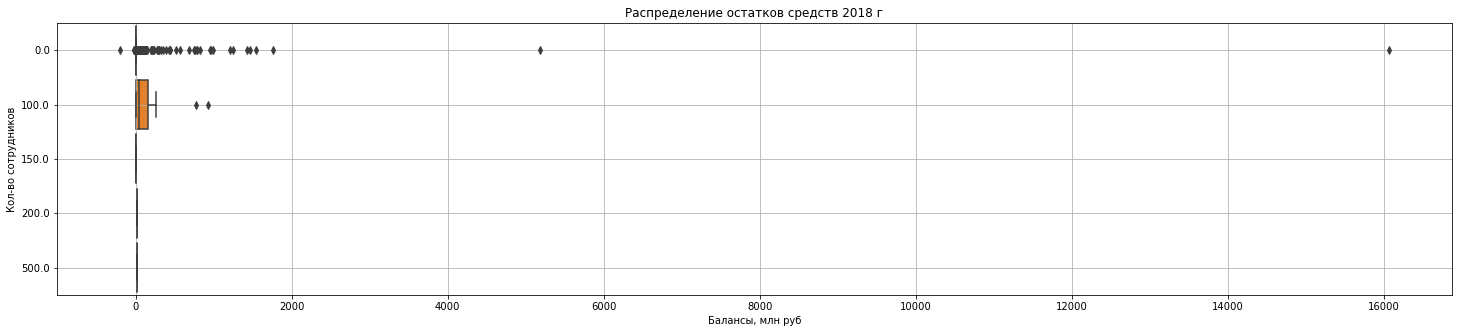

In [64]:
fig = plt.figure(figsize=(25, 5))
boxplot = sns.boxplot(
    data=df_set,
    x="2018 balance",
    y="2018 employees",
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение остатков средств 2018 г');
boxplot.set_xlabel('Балансы, млн руб');
boxplot.set_ylabel('Кол-во сотрудников');
boxplot.grid()

## 2019 год

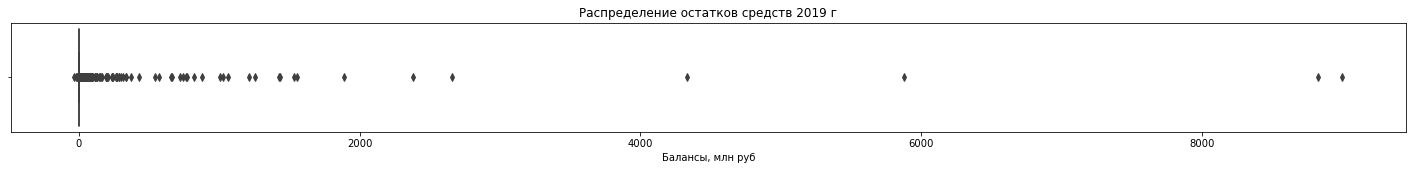

In [65]:
fig = plt.figure(figsize=(25, 2))
boxplot = sns.boxplot(
    data=df_set,
    x="2019 balance",
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение остатков средств 2019 г');
boxplot.set_xlabel('Балансы, млн руб');

## 2020 год

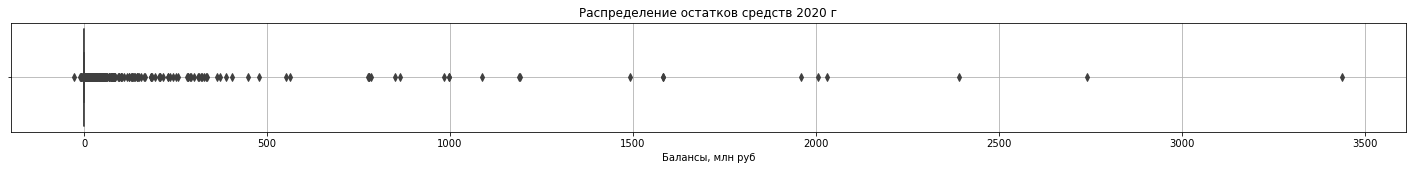

In [66]:
fig = plt.figure(figsize=(25, 2))
boxplot = sns.boxplot(
    data=df_set,
    x="2020 balance",
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение остатков средств 2020 г');
boxplot.set_xlabel('Балансы, млн руб');
boxplot.grid()

## 2021 год

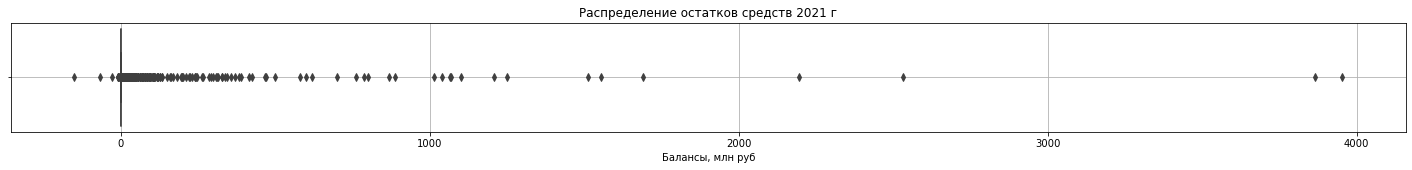

In [68]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 7))
fig = plt.figure(figsize=(25, 2))
boxplot = sns.boxplot(
    data=df_set,
    x="2021 balance",
    # y="2021 employees",
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение остатков средств 2021 г');
boxplot.set_xlabel('Балансы, млн руб');
boxplot.grid()

#### Зададим порог чистого дохода, по превышению которого, фонд будет попадать к нам в наблюдение

In [69]:
MAX_BALANCE = 1000 # Более 1 млрд руб остатка на балансе на конец отчетного периода

Настроим маски для фильтрации фондов

In [71]:
mask_2017 = (df['2017 balance'] > MAX_BALANCE)
mask_2018 = (df['2018 balance'] > MAX_BALANCE)
mask_2019 = (df['2019 balance'] > MAX_BALANCE)
mask_2020 = (df['2020 balance'] > MAX_BALANCE)
mask_2021 = (df['2021 balance'] > MAX_BALANCE)

In [73]:
top_balance = df[mask_2017 | mask_2018 | mask_2019 | mask_2020 | mask_2021]

print('В нашу выборку попадает:', top_income.shape[0], 'фондов')

В нашу выборку попадает: 25 фондов


In [74]:
top_balance.head()

,Наименование,Регистрационный номер,Дата регистрации,Статус,Организационно-правовая форма,"2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB",...,"2021, Всего использовано средств, RUB",direction,location_name,2017 employees,2018 employees,2017 balance,2018 balance,2019 balance,2020 balance,2021 balance
314,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ ВЕТЕРАНОВ ТРУ...,1.087799e+12,2008-04-02 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,9.059100e+07,Северный,Хорошевский,0.0,0.0,1053.023,0.000,658.943,552.456,467.601
808,"ВТБ-СТРАНА, БФ",1.067799e+12,2006-09-06 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,6.949270e+08,Центральный,Тверской,5.0,0.0,0.000,0.722,0.956,255.179,1013.395
917,"ДАР, НО БФСО",1.057747e+12,2005-05-17 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,3.428290e+08,Юго-Западный,Обручевский,0.0,0.0,203.101,1426.243,1004.811,850.606,616.768
1272,"ЗАЩИТА, ФОНД",1.187700e+12,2018-08-17 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,2.054067e+09,Центральный,Хамовники,0.0,0.0,0.000,1754.876,4334.800,2031.541,7.948
1379,"ИМАН, БФ",1.177700e+12,2017-11-17 00:00:00,Действующая,Благотворительные фонды,NaN,NaN,NaN,NaN,NaN,...,NaN,Центральный,Якиманка,0.0,0.0,0.000,0.151,2382.613,117.278,0.000


### Отфильтруем метрики

In [75]:
cols = ['Наименование', '2017 employees', '2018 employees', '2017 balance', '2018 balance', '2019 balance', '2020 balance', '2021 balance']
top_balance_set  = top_income[cols]
top_balance_set.head()

,Наименование,2017 employees,2018 employees,2017 balance,2018 balance,2019 balance,2020 balance,2021 balance
314,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ ВЕТЕРАНОВ ТРУ...,0.0,0.0,1053.023,0.000,658.943,552.456,467.601
808,"ВТБ-СТРАНА, БФ",5.0,0.0,0.000,0.722,0.956,255.179,1013.395
917,"ДАР, НО БФСО",0.0,0.0,203.101,1426.243,1004.811,850.606,616.768
1272,"ЗАЩИТА, ФОНД",0.0,0.0,0.000,1754.876,4334.800,2031.541,7.948
1379,"ИМАН, БФ",0.0,0.0,0.000,0.151,2382.613,117.278,0.000


### Основные статистики по нашим метрикам

In [76]:
top_balance_set.describe()

,2017 employees,2018 employees,2017 balance,2018 balance,2019 balance,2020 balance,2021 balance
count,19.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,3.157895,8.000000,1088.809800,1578.201120,2055.386320,1174.273680,1126.164960
std,3.419928,27.688746,1886.802467,3181.525133,2428.065311,881.262964,1082.072533
min,0.000000,0.000000,0.000000,0.000000,0.956000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,441.109000,770.086000,552.456000,325.546000
50%,5.000000,0.000000,881.963000,825.623000,1211.420000,996.377000,1039.373000
75%,5.000000,0.000000,1103.752000,1242.721000,1892.007000,1581.355000,1510.095000
max,10.000000,100.000000,9000.000000,16063.862000,9000.000000,3439.137000,3953.372000


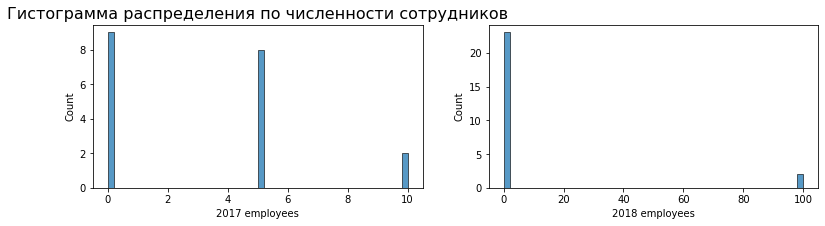

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 3))
sns.histplot(
    data=top_balance_set,
    x='2017 employees',
    bins=50, #kde=True,
    ax=axes[0]
);

sns.histplot(
    data=top_balance_set,
    x='2018 employees',
    bins=50, #kde=True,
    ax=axes[1]
);
axes[0].set_title('Гистограмма распределения по численности сотрудников', fontsize=16);

### Посмотрим на распределение прибыли по годам, для наших топов

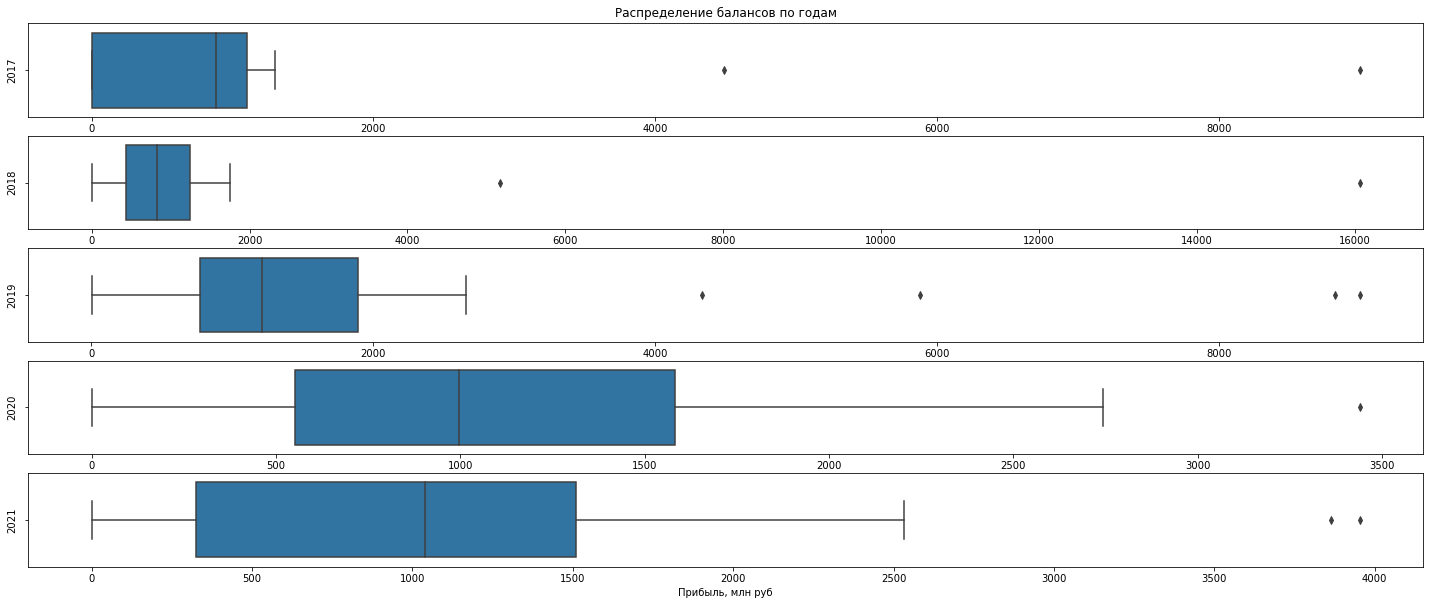

In [82]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(25, 10))

boxplot1 = sns.boxplot(
    data=top_balance_set,
    x="2017 balance", 
    orient='h', ax=axes[0]
)
boxplot1.set_ylabel('2017');
#boxplot1.set_xticks([x*10 for x in range(-3, 34)]);
boxplot1.set_title('Распределение балансов по годам');
boxplot2 = sns.boxplot(
    data=top_balance_set,
    x="2018 balance",
    orient='h', ax=axes[1]
)
boxplot2.set_ylabel('2018');
#boxplot2.set_xticks([x*10 for x in range(-3, 34)]);
boxplot3 = sns.boxplot(
    data=top_balance_set,
    x="2019 balance",
    orient='h', ax=axes[2]
)
boxplot3.set_ylabel('2019');
#boxplot3.set_xticks([x*10 for x in range(-3, 34)]);
boxplot4 = sns.boxplot(
    data=top_balance_set,
    x="2020 balance", 
    orient='h', ax=axes[3]
)
boxplot4.set_ylabel('2020');
#boxplot4.set_xticks([x*10 for x in range(-3, 34)]);
boxplot5 = sns.boxplot(
    data=top_balance_set,
    x="2021 balance",
    orient='h', ax=axes[4]
)
boxplot5.set_ylabel('2021');
#boxplot5.set_xticks([x*10 for x in range(-3, 34)]);


boxplot5.set_xlabel('Прибыль, млн руб');

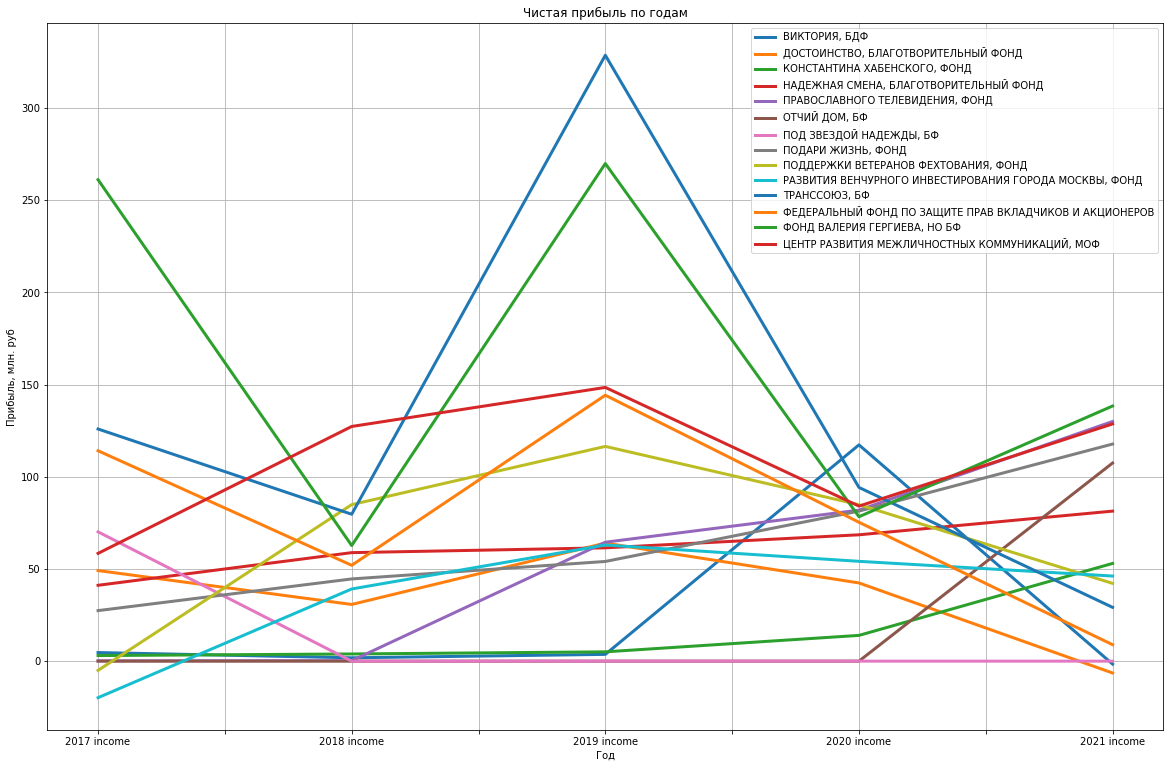

In [228]:
for idx, row in top_income_set.iterrows():
    row[3:].plot(
    kind='line', figsize=(20, 13),
    title='Чистая прибыль по годам',
    grid = True, lw=3
    );
    plt.xlabel('Год')
    plt.ylabel('Прибыль, млн. руб')
    plt.legend(top_income_set['Наименование'])

### Отдельно рассмотрим самый топ по прибыли

In [241]:
top_of_the_top_set = top_of_the_top[cols]
display(top_of_the_top_set)

,Наименование,2017 employees,2018 employees,2017 income,2018 income,2019 income,2020 income,2021 income
2975,"СОДЕЙСТВИЯ ОПК, ФОНД",5.0,0.0,0.0,0.0,0.0,0.0,1555.112


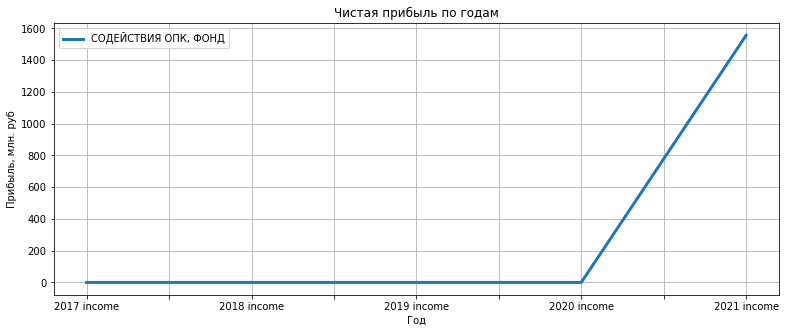

In [240]:
for idx, row in top_of_the_top_set.iterrows():
    row[3:].plot(
    kind='line', figsize=(13, 5),
    title='Чистая прибыль по годам',
    grid = True, lw=3
    );
    plt.xlabel('Год')
    plt.ylabel('Прибыль, млн. руб')
    plt.legend(top_of_the_top_set['Наименование'])